In [1]:
import pandas as pd
import csv
from sqlalchemy import create_engine

In [3]:
cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
               "@{host}:{port}/{database}")
engine = create_engine(cnxn_string.format(
    username="postgres", 
    pswd="1", 
    host="localhost", 
    port=5432,
    database="sqlda"))  

In [30]:
df = pd.read_csv('public_transportation_statistics_by_zip_code.csv', dtype={'zip_code':'str'})

In [8]:
df.head()

,zip_code,public_transportation_pct,public_transportation_population
0,01379,3.3,13
1,01440,0.4,34
2,01505,0.9,23
3,01524,0.5,20
4,01529,1.8,32


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33120 entries, 0 to 33119
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   zip_code                          33120 non-null  object 
 1   public_transportation_pct         33120 non-null  float64
 2   public_transportation_population  33120 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 776.4+ KB


In [33]:
df.to_sql('public_transportation_statistics_zip_code', engine, index=False, if_exists='replace')

120

In [15]:
df['public_transportation_pct'].loc[df['public_transportation_pct']<0].count()

554

<AxesSubplot:ylabel='Frequency'>

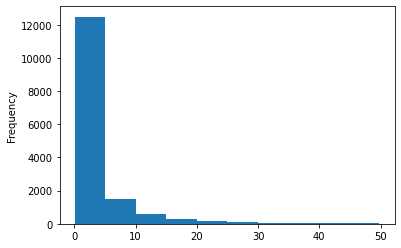

In [23]:
df['public_transportation_pct'].loc[(df['public_transportation_pct']>0.0)&(df['public_transportation_pct']<50.0)].plot.hist(y='public_transportation_pct')

<AxesSubplot:ylabel='Frequency'>

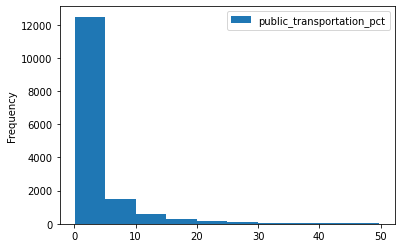

In [22]:
data = pd.read_sql_query('''SELECT * FROM public_transportation_by_zip WHERE 
public_transportation_pct > 0 AND public_transportation_pct < 50''', engine)
data.plot.hist(y='public_transportation_pct')

In [29]:
df.to_sql('public_transportation_by_zip', engine, if_exists='replace')

120